In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
camera_df = pd.read_csv('../data/camera-20220925/Camera_Italia_LivComune.txt', sep=';')
senato_df = pd.read_csv('../data/senato-20220925/Senato_Italia_LivComune.txt', sep=';')

camera_df.head(2)
# camera_df.head(5)
# senato_df.head(1)
# print(camera_df.info(), senato_df.info())

,DATAELEZIONE,CODTIPOELEZIONE,CIRC-REG,COLLPLURI,COLLUNINOM,COMUNE,ELETTORITOT,ELETTORIM,VOTANTITOT,VOTANTIM,SKBIANCHE,VOTILISTA,DESCRLISTA,COGNOME,NOME,LUOGONASCITA,DATANASCITA,SESSO,VOTICANDIDATO
0,25/9/2022 00:00:00,C,PIEMONTE 1,PIEMONTE 1 - P01,PIEMONTE 1 - U03 (COLLEGNO),CASELLE TORINESE,10851,5312,7075,3523,84,631,LEGA PER SALVINI PREMIER,MACCANTI,ELENA,TORINO,05/02/1971,F,2892
1,25/9/2022 00:00:00,C,PIEMONTE 1,PIEMONTE 1 - P01,PIEMONTE 1 - U03 (COLLEGNO),CASELLE TORINESE,10851,5312,7075,3523,84,476,FORZA ITALIA,MACCANTI,ELENA,TORINO,05/02/1971,F,2892


In [7]:
camera_df.describe()

,ELETTORITOT,ELETTORIM,VOTANTITOT,VOTANTIM,SKBIANCHE,VOTILISTA,VOTICANDIDATO
count,117591.000000,117591.000000,117591.000000,117591.000000,117591.000000,117591.000000,117591.000000
mean,5830.668138,2814.348802,3729.120349,1851.793479,62.587766,230.201759,740.080457
std,18766.238519,8831.650934,11958.196469,5774.903466,155.140748,1241.157919,3079.650402
min,25.000000,13.000000,14.000000,10.000000,0.000000,0.000000,0.000000
25%,833.000000,415.000000,517.000000,267.000000,11.000000,7.000000,20.000000
50%,1965.000000,975.000000,1249.000000,639.000000,25.000000,30.000000,123.000000
75%,4928.000000,2420.000000,3198.000000,1611.000000,59.000000,130.000000,512.000000
max,373633.000000,174298.000000,239865.000000,112636.000000,4430.000000,82518.000000,93462.000000


In [5]:
senato_df.describe()

,ELETTORITOT,ELETTORIM,VOTANTITOT,VOTANTIM,SKBIANCHE,VOTILISTA,VOTICANDIDATO
count,117510.000000,117510.000000,117510.000000,117510.000000,117510.000000,117510.000000,117510.000000
mean,5993.013378,2891.388546,3832.580197,1902.874887,66.281057,226.375849,727.244200
std,24470.088598,11485.252595,15618.166820,7512.836462,185.227253,1551.114745,3880.034778
min,25.000000,13.000000,14.000000,10.000000,0.000000,0.000000,0.000000
25%,822.000000,409.000000,511.000000,264.000000,11.000000,6.000000,16.000000
50%,1985.000000,983.000000,1269.000000,649.000000,26.000000,28.000000,112.000000
75%,5105.000000,2497.000000,3304.000000,1669.000000,62.000000,124.000000,496.000000
max,837780.000000,387215.000000,560755.000000,265344.000000,6782.000000,146104.000000,213303.000000


In [6]:
camera_df.nunique()

DATAELEZIONE          1
CODTIPOELEZIONE       1
CIRC-REG             27
COLLPLURI            49
COLLUNINOM          146
COMUNE             7824
ELETTORITOT        4875
ELETTORIM          3666
VOTANTITOT         4116
VOTANTIM           3035
SKBIANCHE           481
VOTILISTA          3585
DESCRLISTA           23
COGNOME            1204
NOME                540
LUOGONASCITA        579
DATANASCITA        1243
SESSO                 2
VOTICANDIDATO      4027
dtype: int64

In [4]:
comune_groupby = camera_df.groupby(['CIRC-REG', 'COMUNE'], as_index='COMUNE')

comune_groupby = comune_groupby['ELETTORITOT'].max() < 1000
comune_groupby_df = pd.DataFrame(comune_groupby)

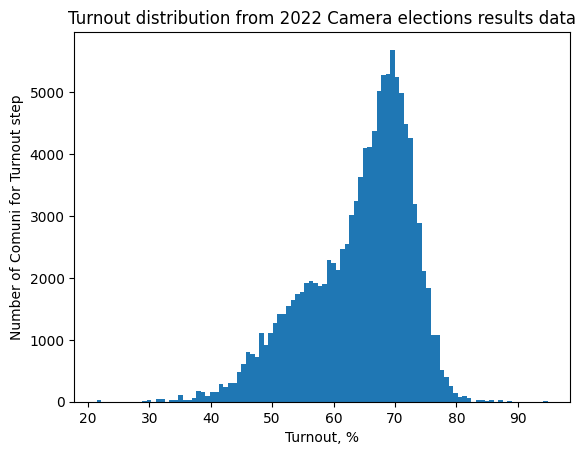

In [9]:
turnout_pct = camera_df['VOTANTITOT']/ camera_df['ELETTORITOT'] * 100

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


major_ticks = np.arange(0, 101, 10)
ax.set_xticks(major_ticks)
ax.set_title('Turnout distribution from 2022 Camera elections results data')
ax.set_xlabel('Turnout, %')
ax.set_ylabel('Number of Comuni for Turnout step')

ax.hist(x=turnout_pct, bins=100)
plt.show()

In [6]:
winner_party = "FRATELLI D'ITALIA CON GIORGIA MELONI"
opposition_winner = "PARTITO DEMOCRATICO - ITALIA DEMOCRATICA E PROGRESSISTA"
liste_camera_df = camera_df[['COMUNE', 'DESCRLISTA','VOTILISTA', 'VOTANTITOT', 'ELETTORITOT']].groupby(by=['COMUNE', 'DESCRLISTA']).sum()
filtered_df_winner = liste_camera_df.filter(like=winner_party, axis=0)
filtered_df_winner['VOTILISTA_PCT'] = filtered_df_winner['VOTILISTA'] / filtered_df_winner['VOTANTITOT'] * 100
filtered_df_winner['VOTANTITOT_PCT'] = filtered_df_winner['VOTANTITOT'] / filtered_df_winner['ELETTORITOT'] * 100
filtered_df_opp = liste_camera_df.filter(like=opposition_winner, axis=0)
filtered_df_opp['VOTILISTA_PCT'] = filtered_df_opp['VOTILISTA'] / filtered_df_opp['VOTANTITOT'] * 100
filtered_df_opp['VOTANTITOT_PCT'] = filtered_df_opp['VOTANTITOT'] / filtered_df_opp['ELETTORITOT'] * 100
# print(filtered_df.sort_values(by='VOTANTITOT', ascending=False))

/tmp/ipykernel_13919/2330555061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_winner['VOTILISTA_PCT'] = filtered_df_winner['VOTILISTA'] / filtered_df_winner['VOTANTITOT'] * 100
/tmp/ipykernel_13919/2330555061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_winner['VOTANTITOT_PCT'] = filtered_df_winner['VOTANTITOT'] / filtered_df_winner['ELETTORITOT'] * 100
/tmp/ipykernel_13919/2330555061.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Text(0.5, 1.0, 'Electoral Footprint Winning Party, Italian Camera 2022')

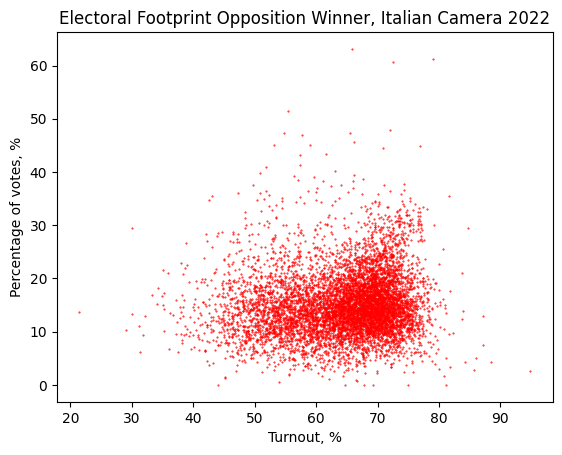

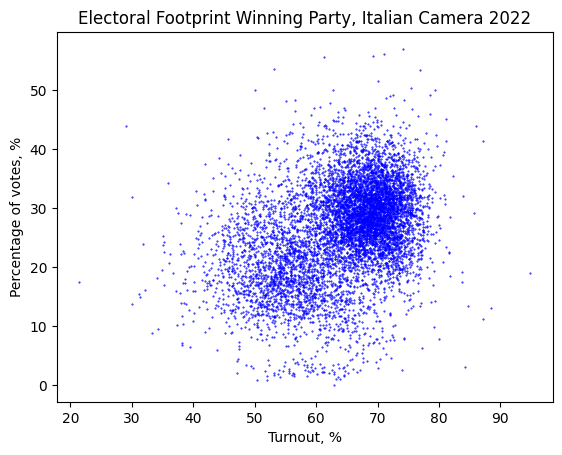

In [28]:

fingerprint_opp = filtered_df_opp.plot.scatter(x='VOTANTITOT_PCT', y='VOTILISTA_PCT', color='red',s=0.2)
fingerprint_winner = filtered_df_winner.plot.scatter(x='VOTANTITOT_PCT', y='VOTILISTA_PCT', color='blue', s=0.2)
fingerprint_opp.set_xlabel('Turnout, %')
fingerprint_opp.set_ylabel('Percentage of votes, %')
fingerprint_opp.set_title("Electoral Footprint Opposition Winner, Italian Camera 2022")

fingerprint_winner.set_xlabel('Turnout, %')
fingerprint_winner.set_ylabel('Percentage of votes, %')
fingerprint_winner.set_title("Electoral Footprint Winning Party, Italian Camera 2022")

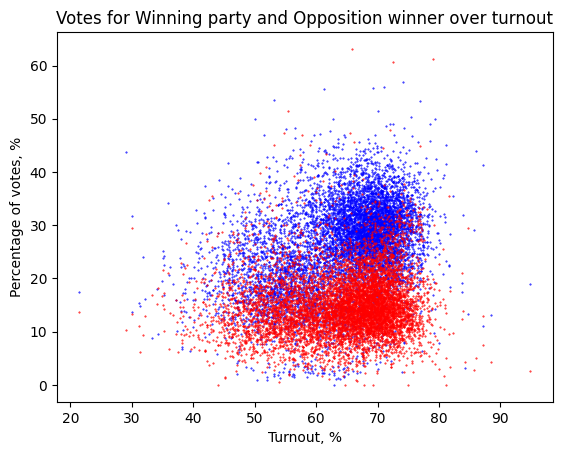

In [26]:
finger= plt.figure()
ax = finger.add_subplot(1,1,1)
ax.set_title('Votes for Winning party and Opposition winner over turnout')
ax.set_xlabel('Turnout, %')
ax.set_ylabel('Percentage of votes, %')

ax.scatter(filtered_df_winner['VOTANTITOT_PCT'], filtered_df_winner['VOTILISTA_PCT'], color='blue', s=0.2)
ax.scatter(filtered_df_opp['VOTANTITOT_PCT'], filtered_df_opp['VOTILISTA_PCT'], color='red', s=0.2)